In [56]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np
import cv2
import h5py
import os
import pydicom

In [7]:
#Convert prob map to B&W
def conv(x):    
    a = x[:, :, 0]
    b = x[:, :, 1]
    a[a > 0.5] = True
    a[a <= 0.5] = False
    return a

hdf = h5py.File("D:\\dataset_seg\\data_2\\phantom_results_yz.h5", 'r')
data = hdf['exported_data']

newData = []
for i in range(data.shape[0]):
    bwOut = conv(data[i])
    bwOut = cv2.resize(bwOut, (512,446))
    newData.append(bwOut)

newData = np.array(newData)


In [8]:
newData.shape

(512, 446, 512)

In [26]:
t = sitk.ReadImage('D:\\dataset_seg\\Phantom_test_data\\SE00006\\IM00001')
orig = t.GetOrigin()
spacing = tuple(t.GetSpacing())
direction = t.GetDirection()
#newData = np.transpose(newData, (1,0,2))

In [40]:
newD = []
for i in range(446):
    newD.append(newData[:, i, :])
newD = np.array(newD)

In [60]:
newD.shape

(446, 512, 512)

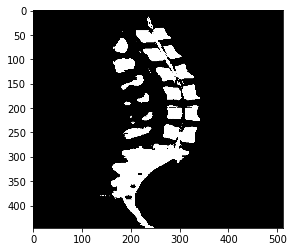

In [43]:
plt.imshow(newD[:, :, 256], cmap="gray")

In [63]:
newImg = sitk.GetImageFromArray(newD)
newImg.SetSpacing(spacing)
newImg.SetOrigin(orig)
newImg.SetDirection((-1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, -1.0))
sitk.WriteImage(newImg, "D:\\dataset_seg\\data_2\\phantom_results_yz_1.mhd")

In [64]:
t.GetSpacing(), newImg.GetSpacing()

((0.435, 0.435, 1.0), (0.435, 0.435, 1.0))

In [65]:
t.GetDirection()

(-1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0)

In [66]:
newImg.GetDirection()

(-1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, -1.0)

In [70]:
t.GetDepth(), newImg.GetDepth()

(1, 446)

In [54]:
x = set()
for i in os.listdir("D:\\dataset_seg\\Phantom_test_data\\SE00006\\"):
    temp = sitk.ReadImage("D:\\dataset_seg\\Phantom_test_data\\SE00006\\" + i)
    x.add(temp.GetDirection())

In [55]:
x

{(-1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0)}

In [58]:
j = pydicom.read_file('D:\\dataset_seg\\Phantom_test_data\\SE00006\\IM00001')
j

(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.392.200036.9116.2.6.1.3268.2060387184.1556602571.113412
(0008, 0020) Study Date                          DA: '20190430'
(0008, 0021) Series Date                         DA: '20190430'
(0008, 0022) Acquisition Date                    DA: '20190430'
(0008, 0023) Content Date                        DA: '20190430'
(0008, 0030) Study Time                          TM: '142153.000'
(0008, 0031) Series Time                         TM: '143026.096'
(0008, 0032) Acquisition Time                    TM: '143033.100'
(0008, 0033) Content Time                        TM: '143034.236'
(0008, 0050) Accession Number                    SH: '10676'
(0008, 0060) Modality                            CS: 'CT'
(0008, 0070) Manufacturer                        LO: 'TOSHIBA'
(0008, 0080) Institution Name

In [75]:
img_direction


(-1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, -1.0)